# Goal is to predict whether someone will quit or not based on HR Dataset

In [54]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV

Importing Data

In [55]:
hr_data = pd.read_csv("HR_comma_sep.csv")

In [56]:
df = pd.DataFrame(hr_data)
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [57]:
# Observing column 'left' -- TARGET COLUMN
df["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

### All of the department info is provided as a string. In order to run a model I need to change this string values into integers. Likewise for the salaries column

In [58]:
salaries = { 'low' : 1, 'medium' : 2, 'high' : 3}
df.salary = [salaries[i] for i in df.salary]
dept = { 'sales':1,
       'technical':2,
       'support':3,
       'IT':4,
       'product_mng':5,
       'marketing':6,
       'RandD':7,
       'accounting':8,
       'hr':9,
       'management':10}
df.Department = [dept[i] for i in df.Department]

### Creating boxplots to observe relationships between 'left' and other data points. Observing this data can help to determine whether certain columns should be removed

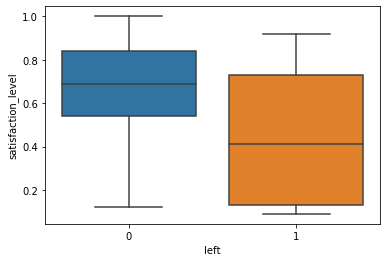

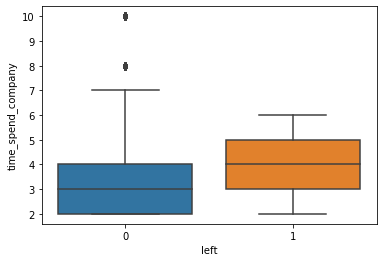

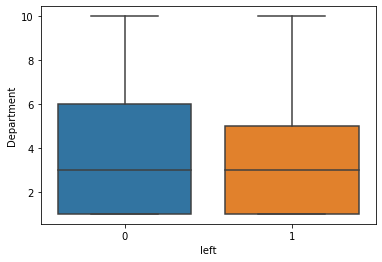

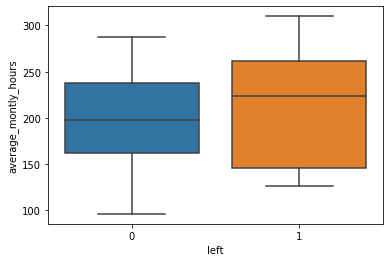

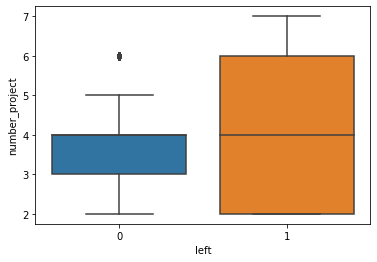

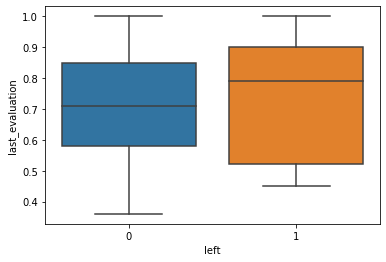

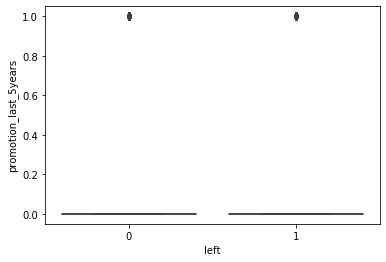

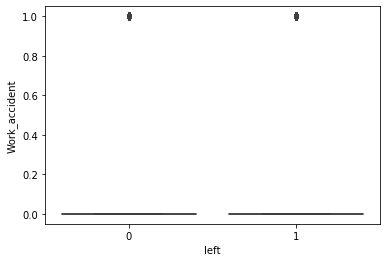

In [59]:
import seaborn as sns

sns.boxplot(x="left", y= "satisfaction_level", data=df)
plt.show()
sns.boxplot(x="left", y="time_spend_company", data=df)
plt.show()
sns.boxplot(x="left", y="Department", data=df)
plt.show()
sns.boxplot(x="left", y="average_montly_hours", data=df)
plt.show()
sns.boxplot(x="left", y="number_project", data=df)
plt.show()
sns.boxplot(x="left", y="last_evaluation", data=df)
plt.show()
sns.boxplot(x="left", y="promotion_last_5years", data=df)
plt.show()
sns.boxplot(x="left", y="Work_accident", data=df)
plt.show()

# Graphing population by department

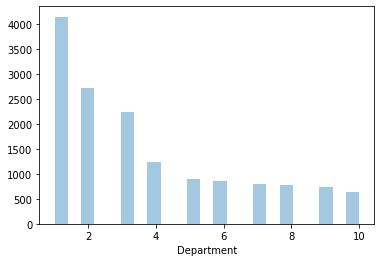

In [60]:
import seaborn as sns

sns.distplot(a=df['Department'], kde=False)

# Designating integer to each department in order to plot satisfaction level by department (y-axis: number of employees, x-axis:satisfaction level, colors: departments)

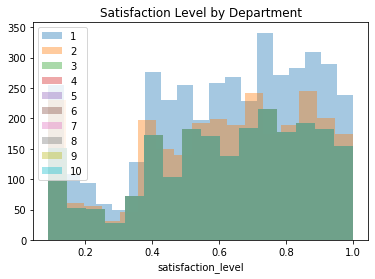

In [61]:
dep1 = df[df['Department'] == 1]
dep2 = df[df['Department'] == 2]
dep3 = df[df['Department'] == 3]
dep4 = df[df['Department'] == 4]
dep5 = df[df['Department'] == 5]
dep6 = df[df['Department'] == 6]
dep7 = df[df['Department'] == 7]
dep8 = df[df['Department'] == 8]
dep9 = df[df['Department'] == 9]
dep10 = df[df['Department'] == 10]
sns.distplot(a=dep1['satisfaction_level'], label="1", kde=False)
sns.distplot(a=dep2['satisfaction_level'], label="2", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="3", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="4", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="5", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="6", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="7", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="8", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="9", kde=False)
sns.distplot(a=dep3['satisfaction_level'], label="10", kde=False)


plt.title("Satisfaction Level by Department")
plt.legend()
# train_df[train_df['Label'] == '1']

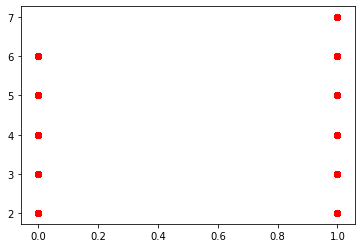

In [62]:
plt.scatter(df.left, df.number_project, marker='o', color='red')

# Analysing the relationships between the data using pairplot

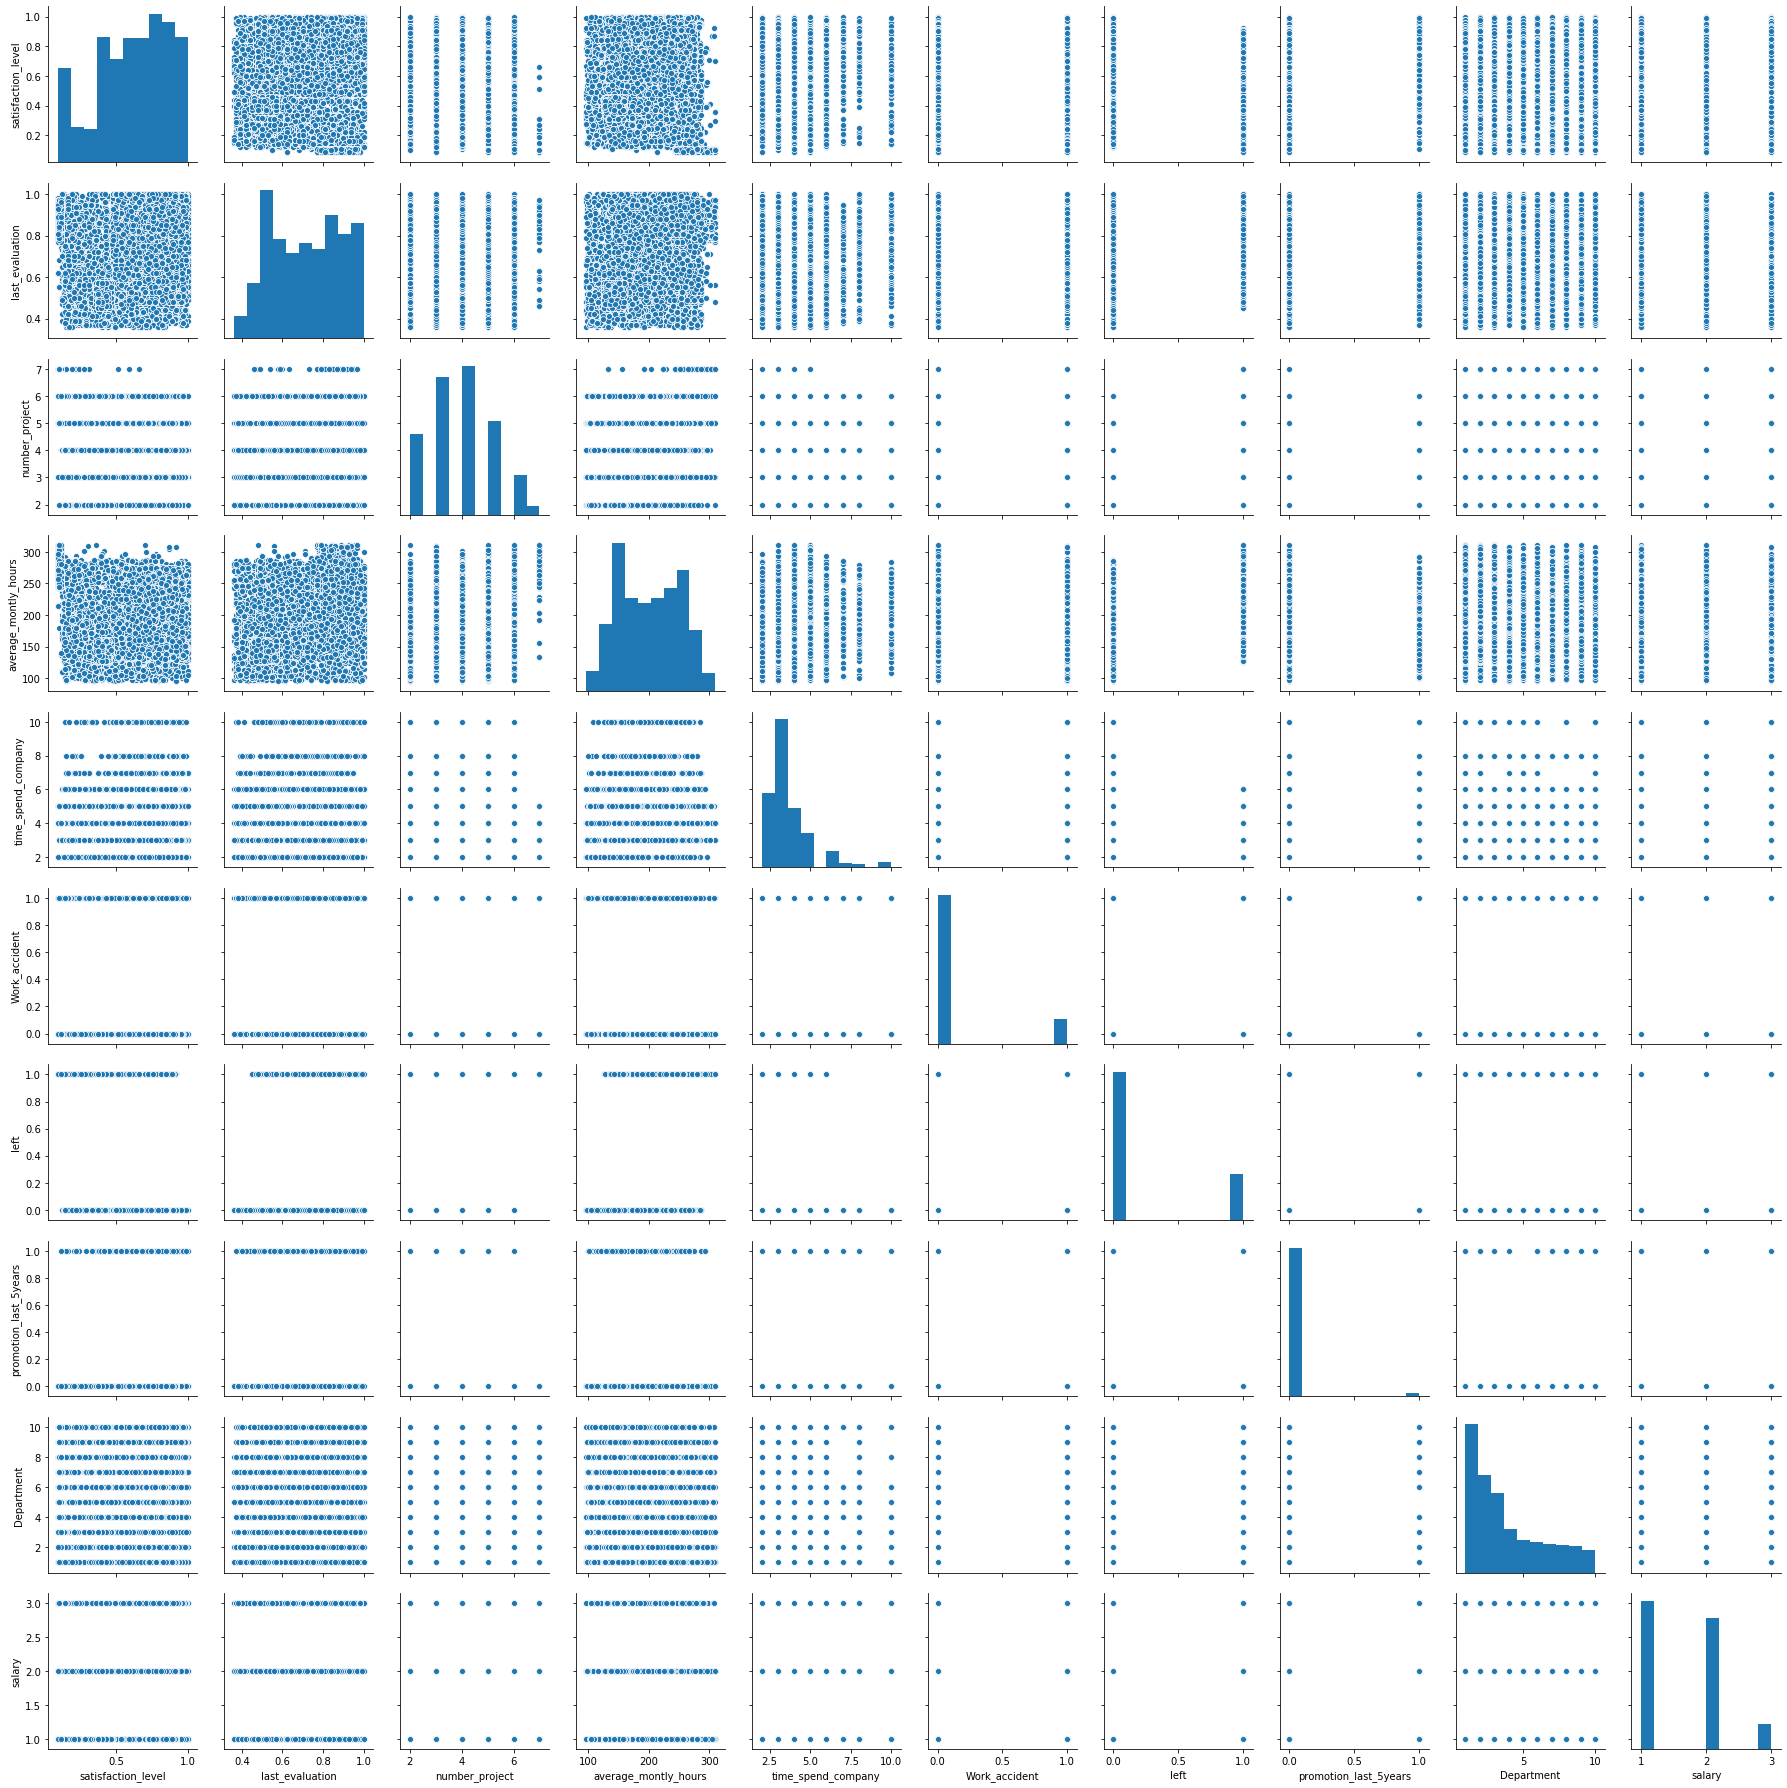

In [63]:
import seaborn as sns
sns.pairplot(df)

In [64]:
corrmat = df.corr()

# Creating a correlation heatmap. If certain columns are highly correlated (multicollinearity), this can affect the outcome of our model. This heatmap makes it easy to observe.

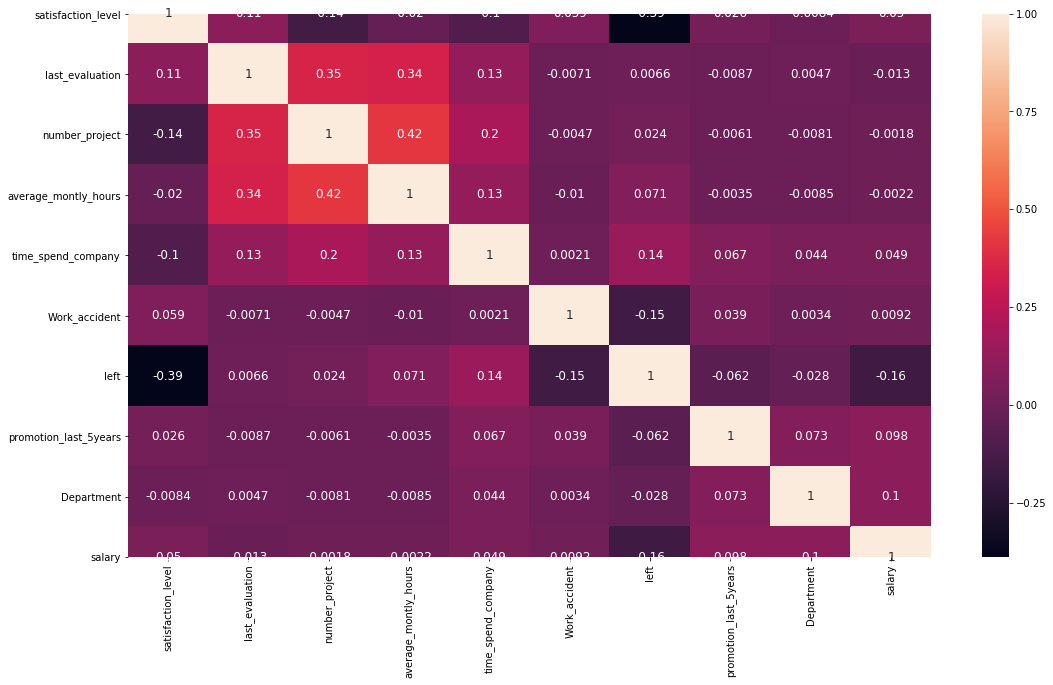

In [65]:
fig, ax = plt.subplots(figsize=(18,10))
sns.heatmap(corrmat, annot=True, annot_kws={'size': 12})

### Setting 'left' as the target data for regression - we want to determine whether someone is leaving or not

In [66]:
y = df["left"]

### Here we are removing columns believed to have little effect on whether a person left the company or not. In addition, we are removing the "left" column as this is our target data. The remaining columns are assigned to the variable X.

In [67]:
to_drop = ["Department", "left", "Work_accident"] # Consider removing last evaluation
df2 = df.drop(to_drop, axis=1)
col = df2.columns
X = df2[col]
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1
1,0.80,0.86,5,262,6,0,2
2,0.11,0.88,7,272,4,0,2
3,0.72,0.87,5,223,5,0,1
4,0.37,0.52,2,159,3,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1
14995,0.37,0.48,2,160,3,0,1
14996,0.37,0.53,2,143,3,0,1
14997,0.11,0.96,6,280,4,0,1


### Splitting training and test data (70:30). Since this is a classification problem we are running a logistic regression and a Random Forest Classifier (for comparison). The logistic regression model's score was approximately 0.768 while the RandomForest Classifier scored a 0.986. THERE IS MORE DONE HERE COME BACK AND FINISH

In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report



X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=(0.3))

#Logistic Regression
model_log = LogisticRegression(random_state=1).fit(X_train, Y_train)
print("vvvvvv LOGISTIC REGRESSION vvvvvv",model_log.score(X_test, Y_test))
preds_log = model_log.predict(X_test)
print(classification_report(Y_test, preds_log))

#Random Forest Classifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_train, Y_train)
print("vvvvvv RANDOM FOREST CLASSIFIER vvvvvv",model_rf.score(X_test, Y_test))
preds_rf = model_rf.predict(X_test)
print(classification_report(Y_test, preds_rf))

#Support Vector Machine
model_svc = SVC(random_state=1)
model_svc.fit(X_train, Y_train)
print("vvvvvv SUPPORT VECTOR MACHINE vvvvvv",model_svc.score(X_test, Y_test))
preds_svc = model_svc.predict(X_test)
print(classification_report(Y_test, preds_svc))

#Decision Tree
model_dt = DTC(random_state=1)
model_dt.fit(X_train, Y_train)
print("vvvvvv DECISION TREE vvvvvv",model_dt.score(X_test, Y_test))
preds_dt = model_dt.predict(X_test)
print(classification_report(Y_test, preds_dt))

#KNN
k_range = range(1,100)
my_dict = {}
for i in k_range:
    neighbor = i
    knn = KNeighborsClassifier (n_neighbors=i, p=2, metric='minkowski')
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    my_dict[i] = scores.mean()
    
best_value = max(my_dict, key=my_dict.get)

knn = KNeighborsClassifier (n_neighbors=best_value, p=2, metric='minkowski')
knn.fit(X_train, Y_train)
print("vvvvvv K NEAREST NEIGHBOR vvvvvv", knn.score(X_test, Y_test))
preds_knn = knn.predict(X_test)
print(classification_report(Y_test, preds_knn))

/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


vvvvvv LOGISTIC REGRESSION vvvvvv 0.7657777777777778
              precision    recall  f1-score   support

           0       0.80      0.93      0.86      3413
           1       0.53      0.25      0.34      1087

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.73      0.77      0.73      4500

vvvvvv RANDOM FOREST CLASSIFIER vvvvvv 0.988
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3413
           1       0.99      0.96      0.97      1087

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500

vvvvvv SUPPORT VECTOR MACHINE vvvvvv 0.956
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      3413
           1       0.90      0.92      0.91      1087

    accuracy                           0.

In [69]:
from sklearn.preprocessing import MinMaxScaler

y = df["left"]
to_drop = ["Department", "left", "Work_accident"]
df3 = df.drop(to_drop, axis=1)
col = df3.columns
X = df3[col]
X

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,promotion_last_5years,salary
0,0.38,0.53,2,157,3,0,1
1,0.80,0.86,5,262,6,0,2
2,0.11,0.88,7,272,4,0,2
3,0.72,0.87,5,223,5,0,1
4,0.37,0.52,2,159,3,0,1
...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1
14995,0.37,0.48,2,160,3,0,1
14996,0.37,0.53,2,143,3,0,1
14997,0.11,0.96,6,280,4,0,1


## Normalizing data and running the same models as before to observe if there are any significant changes from previous results

In [70]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# y = y.values.reshape(-1, 1)

X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=(0.3))

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
# print(X_train)


(10499, 7)
(10499,)
(4500, 7)
(4500,)


In [71]:
minmax = MinMaxScaler()
X_minmax = minmax.fit_transform(X_train)
Xtest_minmax = minmax.fit_transform(X_test)
# print(train_minmax)
print(X_minmax.shape)
Y_train.shape

(10499, 7)


(10499,)

# Running Multiple models on normalized data (Logistic Reg., Random Forest, Decision Tree, KNN, Cross Valid., SVM) - These are used because we are addressing a classification problem (whether and employee will leave or not)

In [72]:
#Logistic Regression
model_log = LogisticRegression(random_state=1).fit(X_minmax, Y_train)
print("vvvvvv LOGISTIC REGRESSION vvvvvv",model_log.score(Xtest_minmax, Y_test))
preds_log = model_log.predict(Xtest_minmax)
print(classification_report(Y_test, preds_log))

#Random Forest Classifier
model_rf = RandomForestClassifier(random_state=1)
model_rf.fit(X_minmax, Y_train)
print("vvvvvv RANDOM FOREST CLASSIFIER vvvvvv",model_rf.score(Xtest_minmax, Y_test))
preds_rf = model_rf.predict(Xtest_minmax)
print(classification_report(Y_test, preds_rf))

#Support Vector Machine
model_svc = SVC(random_state=1)
model_svc.fit(X_minmax, Y_train)
print("vvvvvv SUPPORT VECTOR MACHINE vvvvvv",model_svc.score(Xtest_minmax, Y_test))
preds_svc = model_svc.predict(Xtest_minmax)
print(classification_report(Y_test, preds_svc))

#Decision Tree
model_dt = DTC(random_state=1)
model_dt.fit(X_minmax, Y_train)
print("vvvvvv DECISION TREE vvvvvv",model_dt.score(Xtest_minmax, Y_test))
preds_dt = model_dt.predict(Xtest_minmax)
print(classification_report(Y_test, preds_dt))

#KNN
k_range = range(1,100)
my_dict = {}
for i in k_range:
    neighbor = i
    knn = KNeighborsClassifier (n_neighbors=i, p=2, metric='minkowski')
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    my_dict[i] = scores.mean()
    
best_value = max(my_dict, key=my_dict.get)

knn = KNeighborsClassifier (n_neighbors=best_value, p=2, metric='minkowski')
knn.fit(X_minmax, Y_train)
print("vvvvvv K NEAREST NEIGHBOR vvvvvv", knn.score(Xtest_minmax, Y_test))
preds_knn = knn.predict(Xtest_minmax)
print(classification_report(Y_test, preds_knn))




vvvvvv LOGISTIC REGRESSION vvvvvv 0.7671111111111111
              precision    recall  f1-score   support

           0       0.80      0.92      0.86      3455
           1       0.50      0.25      0.33      1045

    accuracy                           0.77      4500
   macro avg       0.65      0.59      0.60      4500
weighted avg       0.73      0.77      0.74      4500

vvvvvv RANDOM FOREST CLASSIFIER vvvvvv 0.9871111111111112
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      3455
           1       0.99      0.96      0.97      1045

    accuracy                           0.99      4500
   macro avg       0.99      0.98      0.98      4500
weighted avg       0.99      0.99      0.99      4500



/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


vvvvvv SUPPORT VECTOR MACHINE vvvvvv 0.9197777777777778
              precision    recall  f1-score   support

           0       0.94      0.96      0.95      3455
           1       0.85      0.79      0.82      1045

    accuracy                           0.92      4500
   macro avg       0.90      0.87      0.88      4500
weighted avg       0.92      0.92      0.92      4500

vvvvvv DECISION TREE vvvvvv 0.9733333333333334
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      3455
           1       0.92      0.96      0.94      1045

    accuracy                           0.97      4500
   macro avg       0.96      0.97      0.96      4500
weighted avg       0.97      0.97      0.97      4500

vvvvvv K NEAREST NEIGHBOR vvvvvv 0.972
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      3455
           1       0.96      0.92      0.94      1045

    accuracy                           0

## Random Forest Classifier Provided the best results

# Finding best n_neighbor value using a for-loop

In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

k_range = range(1,100)
k_list = list()
my_dict = {}
for i in k_range:
    neighbor = i
    knn = KNeighborsClassifier (n_neighbors=i, p=2, metric='minkowski')
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    my_dict[i] = scores.mean()
    k_list.append(my_dict[i])

best_value = max(my_dict, key=my_dict.get)
print(my_dict)
print(best_value)

{1: 0.9597980201108911, 2: 0.9620650425998194, 3: 0.9503298414144268, 4: 0.949196774644086, 5: 0.9423955740958044, 6: 0.9489961965847625, 7: 0.9416618848513206, 8: 0.9448627295625256, 9: 0.939261729066118, 10: 0.9422619515994761, 11: 0.9377948179623872, 12: 0.9411285292439107, 13: 0.9361280622142292, 14: 0.9386617068661156, 15: 0.9337945286956885, 16: 0.93612817333276, 17: 0.9321943730141896, 18: 0.9351281955031329, 19: 0.9310607507252687, 20: 0.9327277730956783, 21: 0.9301942395919525, 22: 0.932994728703118, 23: 0.9297943951253032, 24: 0.9321282620142514, 25: 0.9290609061697304, 26: 0.9310612396586564, 27: 0.9290609061845452, 28: 0.9311280619327477, 29: 0.9284606171993278, 30: 0.9299940617993403, 31: 0.9283271505326465, 32: 0.9296607284215623, 33: 0.9282603949474513, 34: 0.9299273506585944, 35: 0.9287271283030142, 36: 0.9300606839474834, 37: 0.9284604171474538, 38: 0.9293271727622784, 39: 0.9278601281770513, 40: 0.9288601949252069, 41: 0.9277933059770339, 42: 0.9283934615992735, 43: 0

Text(0, 0.5, 'Corss Val Accuracy')

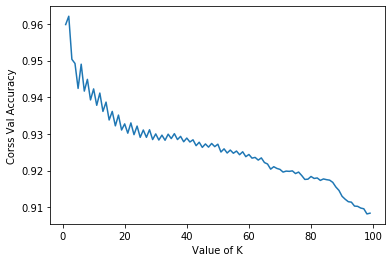

In [74]:
plt.plot(k_range, k_list)
plt.xlabel('Value of K')
plt.ylabel('Corss Val Accuracy')

## Running Cross Validation using KNN and LogisticRegression

In [75]:
knn = KNeighborsClassifier (n_neighbors=best_value, p=2, metric='minkowski')
my_log = LogisticRegression()
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
scores_log = cross_val_score(my_log, X, y, cv=5, scoring='accuracy')
print(scores)
print(scores_log)

[0.97067644 0.93966667 0.95366667 0.97765922 0.96865622]
[0.77740753 0.78233333 0.78033333 0.76992331 0.61520507]


/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/sebastianestrada/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mod

# KNN resulted in greater validation score

In [76]:
print(scores.mean())
print(scores_log.mean())

0.9620650425998194
0.7450405147230201
